In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Load the Excel file with labels
df = pd.read_csv('/content/file_mapping.csv')
import zipfile
import os

zip_path = "/content/genLogoOutput.zip"  # Adjust this after uploading
extract_path = "/content/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the CSV file with image mappings
csv_path = "/content/file_mapping.csv"  # Update this if needed
df = pd.read_csv(csv_path)

# 🔹 Fix path inconsistencies (ensuring all paths use '/')
def get_full_path(filename, label):
    base_folder = "/content" if label.lower() == "genuine" else "/content"
    return os.path.join(base_folder, filename.replace("\\", "/"))  # Normalize paths

# Apply the function to fix file paths
df["Filename"] = df.apply(lambda row: get_full_path(row["Filename"], row["Label"]), axis=1)

# 🔍 Debug: Check missing files before loading
missing_files = df[~df["Filename"].apply(os.path.exists)]
if not missing_files.empty:
    print("❌ Warning: Some files are missing!")
    print(missing_files)

# Image preprocessing parameters
IMG_SIZE = (128, 128)  # Resize all images to 128x128
NUM_CLASSES = 2  # Genuine (1) or Fake (0)

# 📌 Function to load and preprocess images
def load_images(image_paths, labels):
    images = []
    processed_labels = []

    for path, label in zip(image_paths, labels):
        if not os.path.exists(path):  # Check if the file exists
            print(f"🚨 Warning: Image not found - {path}")
            continue

        img = cv2.imread(path)  # Read image

        if img is None:  # If OpenCV fails to read the image
            print(f"⚠ Error loading image: {path}")
            continue

        img = cv2.resize(img, IMG_SIZE)  # Resize to 128x128
        img = img / 255.0  # Normalize (scale pixel values between 0 and 1)

        images.append(img)
        processed_labels.append(1 if label.lower() == "genuine" else 0)

    return np.array(images), np.array(processed_labels)

# 🔥 Load and preprocess images
X, y = load_images(df["Filename"], df["Label"])

# Check if images were loaded
if len(X) == 0:
    raise ValueError("❌ No valid images were loaded! Check file paths.")

# 🔹 One-hot encode labels
y = to_categorical(y, NUM_CLASSES)

# 🔹 Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define file path to save the dataset
save_path = "/content/preprocessed_data.npz"

# Save images and labels
np.savez_compressed(save_path, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

print(f"✅ Preprocessed dataset saved at: {save_path}")


print(f"✅ Dataset ready! Train: {len(X_train)}, Test: {len(X_test)}")


✅ Preprocessed dataset saved at: /content/preprocessed_data.npz
✅ Dataset ready! Train: 660, Test: 165


Class Weights: {0: 0.738255033557047, 1: 1.5492957746478873}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,568,450 (5.98 MB)

 Trainable params: 1,568,450 (5.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.4392 - loss: 0.7358 - val_accuracy: 0.6970 - val_loss: 0.6909
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.4897 - loss: 0.6952 - val_accuracy: 0.6667 - val_loss: 0.5639
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6853 - loss: 0.5780 - val_accuracy: 0.6545 - val_loss: 0.5280
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6854 - loss: 0.5108 - val_accuracy: 0.6848 - val_loss: 0.4805
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7224 - loss: 0.4652 - val_accuracy: 0.6848 - val_loss: 0.5226
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7101 - loss: 0.4672 - val_accuracy: 0.7333 - val_loss: 0.4720
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7270 - loss: 0.4429 - val_accuracy: 0.7576 - val_loss: 0.4697
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8140 - loss: 0.3507 - val_accuracy: 0.7333 - val_loss:

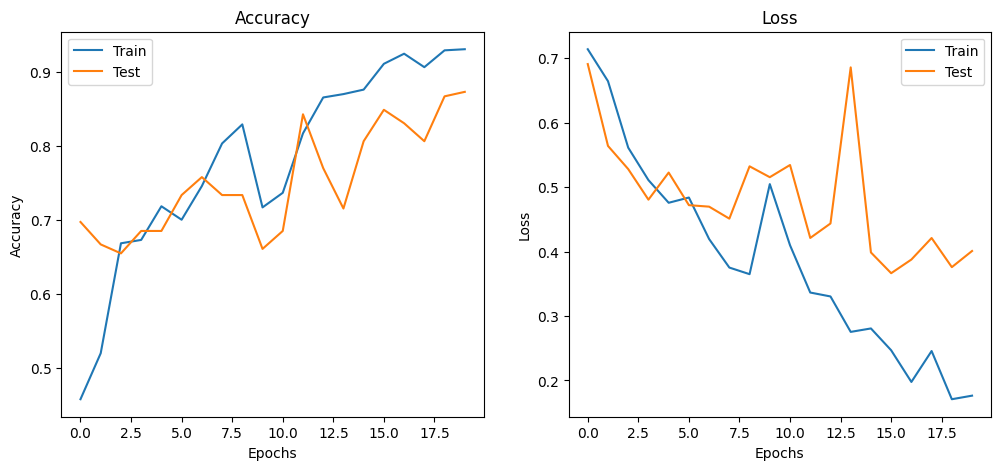

In [ ]:
import matplotlib.pyplot as plt  # Import for plotting
from sklearn.utils.class_weight import compute_class_weight  # Add this import
from sklearn.metrics import classification_report, confusion_matrix  # Add this import

# 🏋 Compute Class Weights
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=np.argmax(y_train, axis=1))
class_weights_dict = {i: class_weights[i] for i in range(NUM_CLASSES)}
print("Class Weights:", class_weights_dict)

# 🏗 Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# ⚡ Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 🏋 Train Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, class_weight=class_weights_dict)

# 📈 Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.4f}")

# 📊 Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print("\n🔎 Classification Report:")
print(classification_report(y_true, y_pred_classes))

# 🔥 Confusion Matrix
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

# 📉 Plot Training Accuracy & Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [ ]:
# Save model as .h5
model.save('/content/cnn_fake_logo_model.h5')
print("Model saved successfully as cnn_fake_logo_model.h5")

Model saved successfully as cnn_fake_logo_model.h5


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load and predict
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

image_path = "/content/000002.jpg"
image = preprocess_image(image_path)

model = load_model('/content/cnn_fake_logo_model.h5')

prediction = model.predict(image)
label = "Genuine" if np.argmax(prediction) == 1 else "Fake"
print(f"Predicted Label: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Predicted Label: Fake
